<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [14]:
import requests

url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite'
response = requests.get(url)

with open('m4_survey_data.sqlite', 'wb') as file:
    file.write(response.content)


#!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite



Connect to the database.


In [15]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [16]:
import pandas as pd

## Demo: How to run an sql query


In [17]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [18]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [19]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [20]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


<Axes: title={'center': 'Distribution of Converted Compensation'}, ylabel='Frequency'>

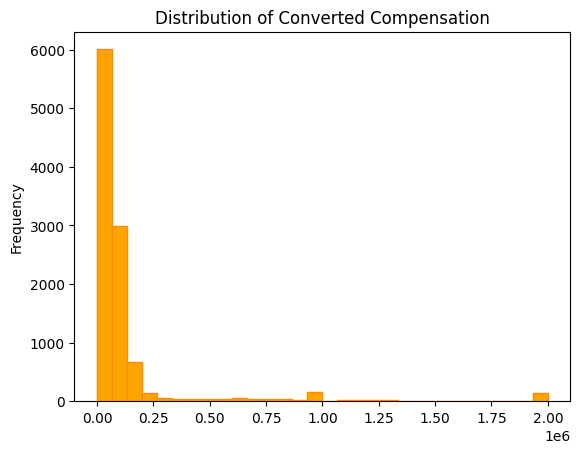

In [ ]:
# your code goes here

# Connect to the database
conn = sqlite3.connect('m4_survey_data.sqlite')

# Load data into a DataFrame 
query = "SELECT ConvertedComp FROM master"
df = pd.read_sql(query, conn)

# Plot the histogram using Pandas
df['ConvertedComp'].dropna().plot(kind='hist', bins=30, color='ORANGE', edgecolor='DARKorange', title='Distribution of Converted Compensation')


### Box Plots


Plot a box plot of `Age.`



<Axes: title={'center': 'Box Plot of Age'}>

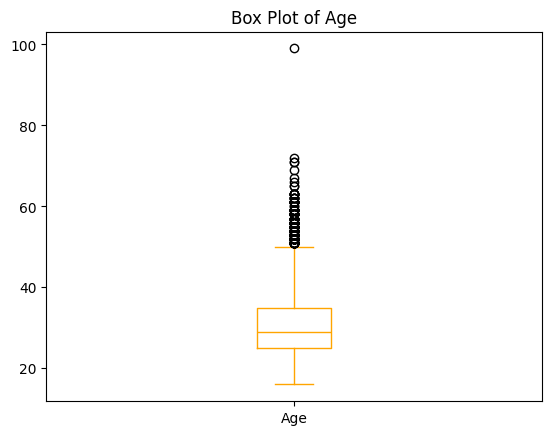

In [ ]:
# your code goes here

# Connect to the database
conn = sqlite3.connect('m4_survey_data.sqlite')

# Load data into a DataFrame 
query = "SELECT Age FROM master"
df = pd.read_sql(query, conn)

# Plot the box plot using Pandas
df['Age'].dropna().plot(kind='box', color='ORANGE', title='Box Plot of Age')



## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


<Axes: title={'center': 'Scatter Plot of Age vs WorkWeekHrs'}, xlabel='Age', ylabel='WorkWeekHrs'>

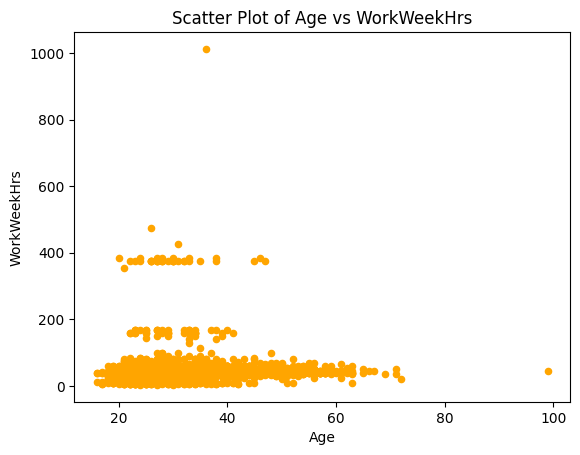

In [45]:
# your code goes here

import sqlite3
import pandas as pd

# Connect to the database
conn = sqlite3.connect('m4_survey_data.sqlite')

# Load data into a DataFrame from master table
query = "SELECT Age, WorkWeekHrs FROM master"
df = pd.read_sql(query, conn)

# Plot the scatter plot using Pandas
df.plot(kind='scatter', x='Age', y='WorkWeekHrs', color='orange', title='Scatter Plot of Age vs WorkWeekHrs')


### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


<Axes: title={'center': 'Bubble Plot of WorkWeekHrs vs CodeRevHrs (Bubble size = Age)'}, xlabel='WorkWeekHrs', ylabel='CodeRevHrs'>

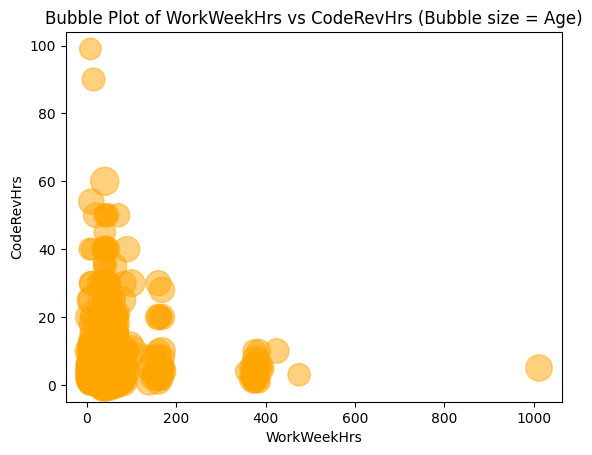

In [ ]:
# your code goes here

# Connect to the database
conn = sqlite3.connect('m4_survey_data.sqlite')

# Load data into a DataFrame from the 'master' table
query = "SELECT WorkWeekHrs, CodeRevHrs, Age FROM master"
df = pd.read_sql(query, conn)

# Handle NaN values in 'Age' column by filling them with 0 (or any other method you prefer)
df = df.dropna(subset=['Age', 'WorkWeekHrs', 'CodeRevHrs'])  # Drop rows with NaN values in relevant columns

# Plot the bubble plot using Pandas (bubble size based on Age)
df.plot(kind='scatter', x='WorkWeekHrs', y='CodeRevHrs', s=df['Age']*10, alpha=0.5, c='orange', title='Bubble Plot of WorkWeekHrs vs CodeRevHrs (Bubble size = Age)')



## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


In [ ]:
# your code goes here

# Connect to the database
conn = sqlite3.connect('m4_survey_data.sqlite')

# Query the table schema to check column names
query = "PRAGMA table_info(master)"
columns = pd.read_sql(query, conn)

# Display column names
print(columns)


    cid          name     type  notnull dflt_value  pk
0     0         index  INTEGER        0       None   0
1     1    Respondent  INTEGER        0       None   0
2     2    MainBranch     TEXT        0       None   0
3     3      Hobbyist     TEXT        0       None   0
4     4   OpenSourcer     TEXT        0       None   0
..  ...           ...      ...      ...        ...  ..
58   58           Age     REAL        0       None   0
59   59         Trans     TEXT        0       None   0
60   60    Dependents     TEXT        0       None   0
61   61  SurveyLength     TEXT        0       None   0
62   62    SurveyEase     TEXT        0       None   0

[63 rows x 6 columns]


### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


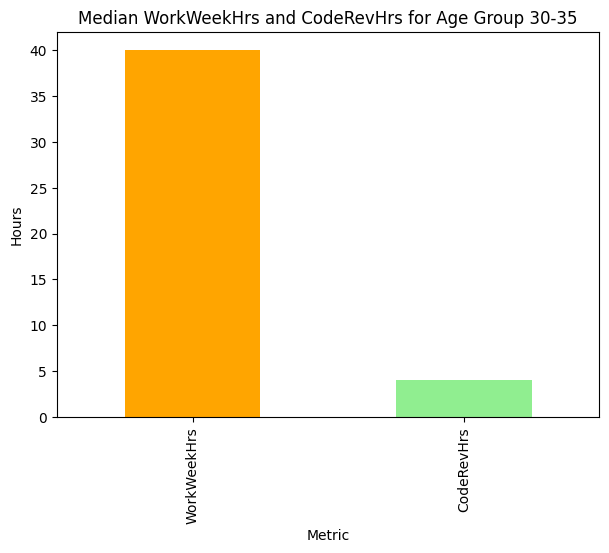

In [ ]:
# your code goes here

import sqlite3
import pandas as pd

# Connect to the database
conn = sqlite3.connect('m4_survey_data.sqlite')

# Load data into a DataFrame from the 'master' table
query = "SELECT Age, WorkWeekHrs, CodeRevHrs FROM master"
df = pd.read_sql(query, conn)

# Filter the data for age group 30 to 35
age_group = df[(df['Age'] >= 30) & (df['Age'] <= 35)]

# Calculate the median values for WorkWeekHrs and CodeRevHrs
median_values = age_group[['WorkWeekHrs', 'CodeRevHrs']].median()

# Plot a stacked bar chart using Pandas (without Matplotlib)
median_values.plot(kind='bar', stacked=True, color=['ORANGE', 'lightgreen'], figsize=(7, 5))

# Add title and labels
plt.title('Median WorkWeekHrs and CodeRevHrs for Age Group 30-35')
plt.xlabel('Metric')
plt.ylabel('Hours')

# Display the chart
plt.show()


## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


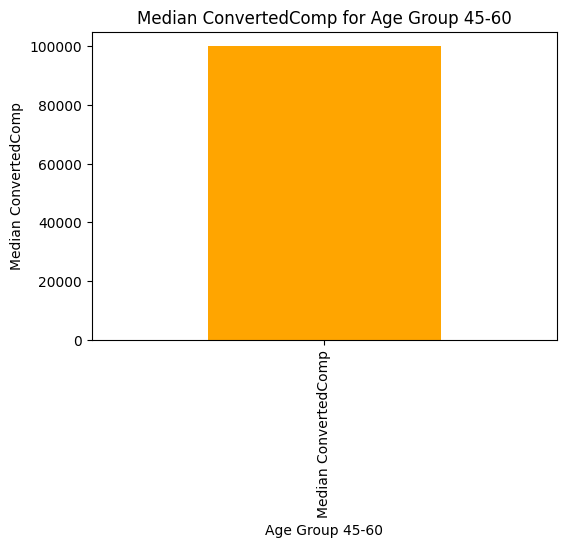

In [ ]:
# your code goes here

# Connect to the database
conn = sqlite3.connect('m4_survey_data.sqlite')

# Load data into a DataFrame from the 'master' table
query = "SELECT Age, ConvertedComp FROM master"
df = pd.read_sql(query, conn)

# Close the database connection
conn.close()

# Filter the data for age group 45 to 60
age_group = df[(df['Age'] >= 45) & (df['Age'] <= 60)]

# Calculate the median value for ConvertedComp in this age group
median_converted_comp = age_group['ConvertedComp'].median()

# Create a DataFrame to plot
median_df = pd.DataFrame({'Metric': ['Median ConvertedComp'], 'Value': [median_converted_comp]})

# Plot the median ConvertedComp as a bar chart using Pandas (without Matplotlib)
median_df.plot(kind='bar', x='Metric', y='Value', color='ORANGE', figsize=(6, 4), legend=False)

# Add title and labels
plt.title('Median ConvertedComp for Age Group 45-60')
plt.xlabel('Age Group 45-60')
plt.ylabel('Median ConvertedComp')

# Display the chart
plt.show()


### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


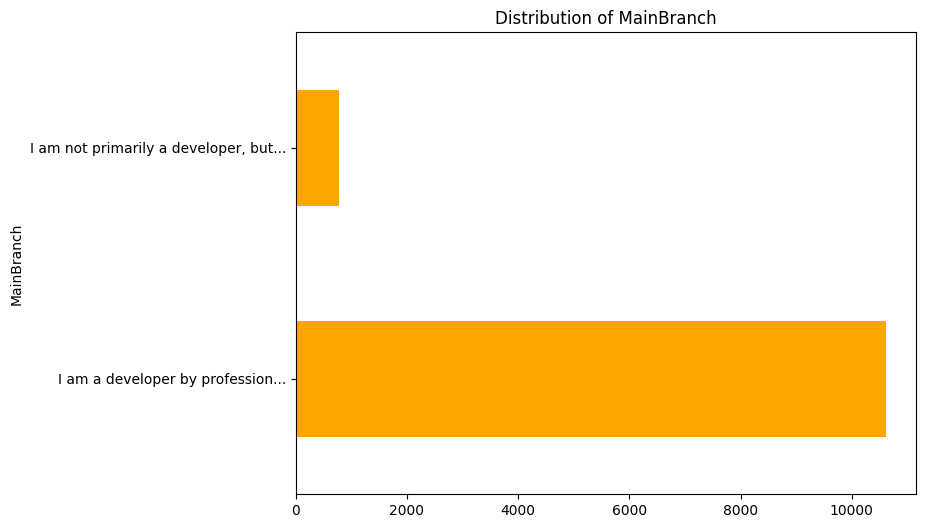

In [83]:
# your code goes here

import sqlite3
import pandas as pd

# Connect to the database
conn = sqlite3.connect('m4_survey_data.sqlite')

# Load data into a DataFrame from the 'master' table
query = "SELECT MainBranch FROM master"
df = pd.read_sql(query, conn)

# Close the database connection
conn.close()

# Count the occurrences of each unique value in 'MainBranch'
mainbranch_counts = df['MainBranch'].value_counts()

mainbranch_counts.index = mainbranch_counts.index.str[:35]+('...')  # Adjust the number as needed


# Plot a horizontal bar chart using Pandas (without Matplotlib)
mainbranch_counts.plot(kind='barh', color='ORANGE', figsize=(8, 6), title='Distribution of MainBranch')

# Display the chart
plt.show()


Close the database connection.


In [80]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
